In [70]:
#1
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report
import matplotlib.pyplot as plt

In [71]:
#2
df=pd.read_csv('Week7_trainmain.csv')

In [72]:



df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
#
df.shape

(42000, 785)

In [74]:
df.iloc[0,0]

1

In [75]:
df.iloc[0,1:].values.reshape(28,28)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0, 188, 255,  94,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0, 191, 250, 253,  93,   0,   0,   0,
          0,   0],
       [  

9


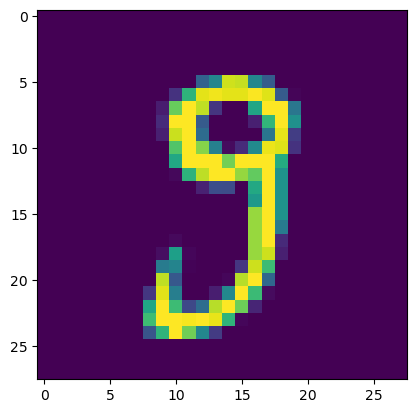

In [76]:
plt.imshow(df.iloc[40, 1:].values.reshape(28, 28))
print(df.iloc[40, 0])

In [77]:
#4
df_sample=df.sample(frac=0.1)

In [78]:
df_sample

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
17159,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11681,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17493,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15577,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10337,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37824,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1981,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10833,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36601,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [79]:
print(df_sample.shape)

(4200, 785)


In [80]:
print(df_sample.head(5))


       label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
17159      2       0       0       0       0       0       0       0       0   
11681      6       0       0       0       0       0       0       0       0   
17493      3       0       0       0       0       0       0       0       0   
15577      8       0       0       0       0       0       0       0       0   
10337      7       0       0       0       0       0       0       0       0   

       pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  \
17159       0  ...         0         0         0         0         0   
11681       0  ...         0         0         0         0         0   
17493       0  ...         0         0         0         0         0   
15577       0  ...         0         0         0         0         0   
10337       0  ...         0         0         0         0         0   

       pixel779  pixel780  pixel781  pixel782  pixel783  
17159         0         0   

In [81]:
# Assuming first column is the class label
print(df_sample.iloc[:, 0].nunique())  


10


In [82]:
print(df_sample.iloc[:,0].value_counts())

1    507
7    462
3    458
2    422
6    417
0    408
9    400
8    388
4    373
5    365
Name: label, dtype: int64


In [83]:
X=df_sample.iloc[:,1:].values

In [84]:
Y = df_sample.iloc[:, 0].values

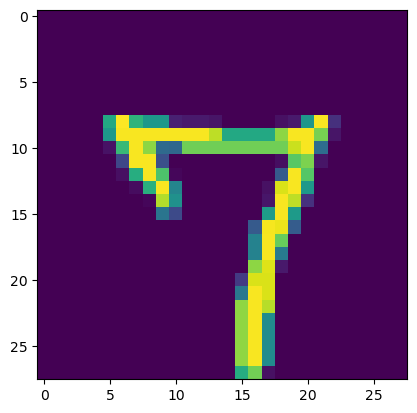

In [85]:
for i in range(5):
    plt.imshow(X[i].reshape(28, 28))

In [86]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25)

In [87]:
#12. Fit KNN Classifier to Training Data
knn=KNeighborsClassifier(n_neighbors=3,metric='minkowski',p=2)
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=3)

In [88]:
#13. Predict Validation Set Results
Y_pred=knn.predict(X_test)

In [89]:
#14. Print the Confusion Matrix
print(confusion_matrix(Y_test,Y_pred))


[[100   0   0   0   0   0   1   0   0   0]
 [  0 146   0   1   0   0   0   0   0   0]
 [  1   9  83   0   0   0   0   0   0   0]
 [  0   2   1 114   0   2   0   2   0   0]
 [  0   1   0   0  75   0   0   2   0   6]
 [  2   1   0   4   0  74   1   0   1   1]
 [  1   0   0   0   0   0 102   0   0   0]
 [  0   3   0   0   3   0   0 109   0   2]
 [  1   2   2   5   3   2   1   2  82   5]
 [  0   0   0   0   2   0   0   6   0  87]]


In [90]:
#15. Print Classification Report & Accuracy
print(classification_report(Y_test,Y_pred))


              precision    recall  f1-score   support

           0       0.95      0.99      0.97       101
           1       0.89      0.99      0.94       147
           2       0.97      0.89      0.93        93
           3       0.92      0.94      0.93       121
           4       0.90      0.89      0.90        84
           5       0.95      0.88      0.91        84
           6       0.97      0.99      0.98       103
           7       0.90      0.93      0.92       117
           8       0.99      0.78      0.87       105
           9       0.86      0.92      0.89        95

    accuracy                           0.93      1050
   macro avg       0.93      0.92      0.92      1050
weighted avg       0.93      0.93      0.92      1050



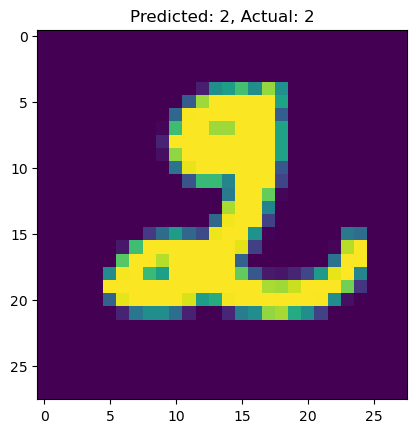

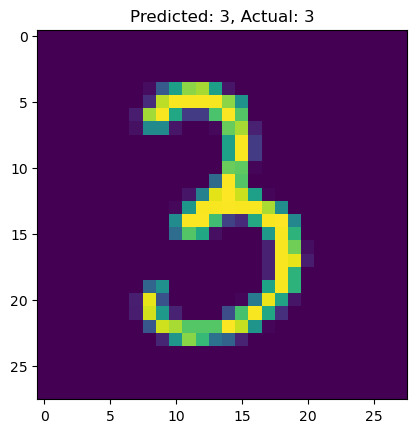

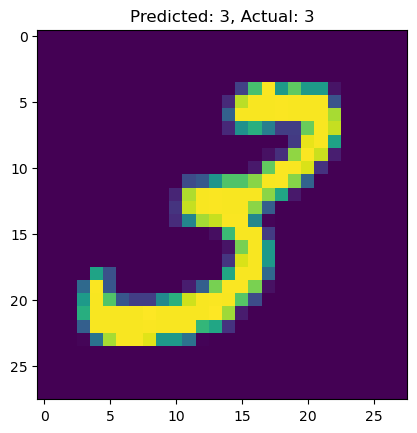

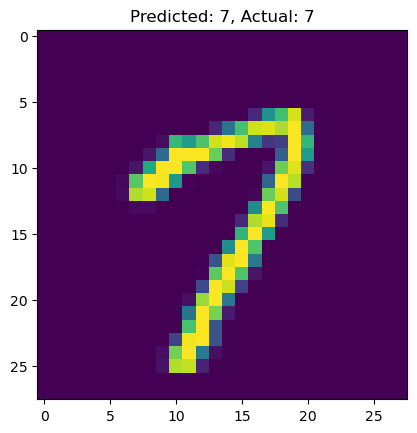

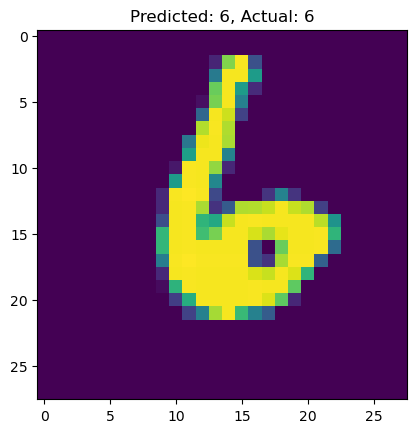

In [91]:
#16. Visualize the First 5 Digits in X-test with Predicted Labels


for i in range(5):
    plt.imshow(X_test[i].reshape(28, 28))
    plt.title(f'Predicted: {Y_pred[i]}, Actual: {Y_test[i]}')
    plt.show()